In this notebook we shall work on a laptop price prediction project using machine learning give the laptop specifications. 

## 1. Problem definition
How well can we predict the future sale price of a laptop,given its specifications and previous examples of how much similar laptops have been sold for?

## 2. Data

The data used in this project was obtained from Kaggle https://www.kaggle.com/datasets/ionaskel/laptop-prices .

The dataset comprises of 1300 laptop models.



## 3.Evaluation

The two main metrics used for estimating the performance of our models would be the R-squared score and the Mean absolute error (MAE). We want to achieve a higher R-squared score and lower MAE score with our models.

The goal for most regression evaluation metrics is to minimize the error.For example ,our goal for this project will be to build a machine learning model which minimises MAE.

## 4. Features

The features in the dataset incude:
* Company Name
* Product Name
* Laptop Type
* Screen Inches
* Screen Resolution
* CPU Model
* RAM Characteristics Memory
* GPU Characteristics
* Operating System
* Laptop's Weight
* Laptop's Price

In [3]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset to be used
laptop_data = pd.read_csv('D:/DS/dataset/laptops.csv')

#Drop the Unnamed: 0 column 
laptop_data.drop('Unnamed: 0',axis=1,inplace=True)

#View a summary of the data top 5 rows
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#Get information about our dataset
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
#Get the shape of our data]
laptop_data.shape

(1303, 12)

In [5]:
#Check for missing values
laptop_data.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

We do not have missing values in our dataset

<AxesSubplot:>

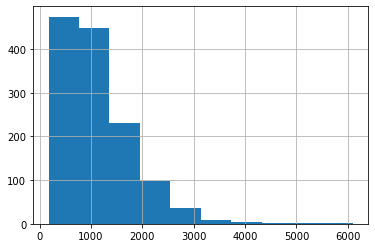

In [6]:
#Checking the distribution of our target variable through a histogram plot
laptop_data.Price_euros.hist()

Most laptops range between the prices of 0-1200 euros

In [7]:
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Feature Engineering

In [8]:
#Convert laptop price from euros to USD 
laptop_data['Price_USD']=laptop_data['Price_euros']*1.05
#Round the price value to two decimal places
laptop_data['Price_USD']=round(laptop_data['Price_USD'],2)

In [9]:
#Create  TouchScreen column our of the screenresolution laptop properties 
laptop_data.loc[laptop_data['ScreenResolution'].str.contains('Touchscreen'),'TouchScreen']='Yes'

In [10]:
#Replace Missing values with No 
laptop_data['TouchScreen']=laptop_data['TouchScreen'].fillna('No')

In [11]:
laptop_data['ScreenResolution'].value_counts

<bound method IndexOpsMixin.value_counts of 0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object>

In [12]:
laptop_data['Ips'] = laptop_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [13]:
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_USD,TouchScreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1406.67,No,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,943.89,No,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,603.75,No,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2664.32,No,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1893.78,No,1


In [14]:
#Extract screen resolution from the screenresolution column
laptop_data['ScreenResolution']=laptop_data['ScreenResolution'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)

In [15]:
#Extract CPU speed numerical value
laptop_data["Cpu_Speed"] = laptop_data["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")


In [16]:
#Extract the type of  CPU in the Laptop 
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
laptop_data['Cpu_Type'] = laptop_data['Cpu'].apply(lambda x: fetch_processor(x))

#Extracting only the numeric value of the ram 
laptop_data['Ram']=laptop_data['Ram'].str.replace("GB", "")

#Extract the memory type from Memory
laptop_data[['Storage_Size(GB)','Storage_Type']]=laptop_data['Memory'].str.split(' ',1,expand=True)

In [17]:
#Extract only  the numerical part of the memory size
laptop_data['Storage_Size(GB)']=laptop_data['Storage_Size(GB)'].str.replace("GB", "")

In [18]:
#Extracting only the numeric value of the weight 
laptop_data['Weight']=laptop_data['Weight'].str.replace("kg", "")
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_USD,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Storage_Size(GB),Storage_Type
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1406.67,No,1,2.3,Intel Core i5,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,943.89,No,0,1.8,Intel Core i5,128,Flash Storage
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,603.75,No,0,2.5,Intel Core i5,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2664.32,No,1,2.7,Intel Core i7,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1893.78,No,1,3.1,Intel Core i5,256,SSD


In [19]:
#Extract the Gpu vender name from the Gpu column values
laptop_data['Gpu_vender']=laptop_data["Gpu"].str.split(" ").apply(lambda x: x[0])

#Extract the Gpu  Type name from the Gpu column values
laptop_data['Gpu_Type']=laptop_data["Gpu"].str.split(" ").apply(lambda x: x[1:])
#Remove brackets
laptop_data["Gpu_Type"] = laptop_data["Gpu_Type"].apply(lambda x: ' '.join(x))


#### Data Transformation
We shall convert the following columns into their respective column types based on data contained
1. Ram
2. Weight
4. Ips
5. Cpu_Speed

In [20]:
#Transforming the data type of some columns that have numerical values

laptop_data['Ram']=laptop_data['Ram'].astype('int')
laptop_data['Weight']=laptop_data['Weight'].astype('float')



In [21]:
#Reaplce the text value and float point in storage size column
laptop_data['Storage_Size(GB)']=laptop_data['Storage_Size(GB)'].str.replace("TB", "")
laptop_data['Storage_Size(GB)']=laptop_data['Storage_Size(GB)'].replace({'1.0':'1'})

In [22]:
#Convert the TB storage value into it's equivalent storage type
laptop_data['Storage_Size(GB)']=laptop_data['Storage_Size(GB)'].apply(lambda x: 1024 if x==1 else x)
laptop_data['Storage_Size(GB)']=laptop_data['Storage_Size(GB)'].apply(lambda x: 2048 if x==2 else x)

In [23]:
laptop_data['OpSys']=laptop_data['OpSys'].str.replace("Mac OS X","macOS")

In [24]:
def findXresolution(s):
    return s.split()[-1].split("x")[0]
def findYresolution(s):
    return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
laptop_data['X_res'] = laptop_data['ScreenResolution'].apply(lambda x: findXresolution(x))
laptop_data['Y_res'] = laptop_data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
laptop_data['X_res'] = laptop_data['X_res'].astype('int')
laptop_data['Y_res'] = laptop_data['Y_res'].astype('int')

laptop_data['ppi'] = (((laptop_data['X_res']**2) + (laptop_data['Y_res']**2))**0.5/laptop_data['Inches']).astype('float')

In [25]:
laptop_data.drop(columns=['ScreenResolution','X_res','Y_res'],inplace=True)

In [26]:
laptop_data.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Price_USD,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Storage_Size(GB),Storage_Type,Gpu_vender,Gpu_Type,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1406.67,No,1,2.3,Intel Core i5,128,SSD,Intel,Iris Plus Graphics 640,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,943.89,No,0,1.8,Intel Core i5,128,Flash Storage,Intel,HD Graphics 6000,127.677940
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,603.75,No,0,2.5,Intel Core i5,256,SSD,Intel,HD Graphics 620,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2664.32,No,1,2.7,Intel Core i7,512,SSD,AMD,Radeon Pro 455,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1893.78,No,1,3.1,Intel Core i5,256,SSD,Intel,Iris Plus Graphics 650,226.983005


In [27]:
laptop_data['Memory'] = laptop_data['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_data["Memory"] = laptop_data["Memory"].str.replace('GB', '')
laptop_data["Memory"] = laptop_data["Memory"].str.replace('TB', '000')
new2 = laptop_data["Memory"].str.split("+", n = 1, expand = True)
laptop_data["first"]= new2[0]
laptop_data["first"]=laptop_data["first"].str.strip()
laptop_data["second"]= new2[1]
laptop_data["Layer1HDD"] = laptop_data["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer1SSD"] = laptop_data["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer1Hybrid"] = laptop_data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer1Flash_Storage"] = laptop_data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptop_data['first'] = laptop_data['first'].str.replace(r'\D', '')
laptop_data["second"].fillna("0", inplace = True)
laptop_data["Layer2HDD"] = laptop_data["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer2SSD"] = laptop_data["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer2Hybrid"] = laptop_data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer2Flash_Storage"] = laptop_data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptop_data['second'] = laptop_data['second'].str.replace(r'\D', '')
laptop_data["first"] = laptop_data["first"].astype(int)
laptop_data["second"] = laptop_data["second"].astype(int)
laptop_data["Total_Memory"]=(laptop_data["first"]*(laptop_data["Layer1HDD"]+laptop_data["Layer1SSD"]+laptop_data["Layer1Hybrid"]+laptop_data["Layer1Flash_Storage"])+laptop_data["second"]*(laptop_data["Layer2HDD"]+laptop_data["Layer2SSD"]+laptop_data["Layer2Hybrid"]+laptop_data["Layer2Flash_Storage"]))
laptop_data["Memory"]=laptop_data["Total_Memory"]
laptop_data["HDD"]=(laptop_data["first"]*laptop_data["Layer1HDD"]+laptop_data["second"]*laptop_data["Layer2HDD"])
laptop_data["SSD"]=(laptop_data["first"]*laptop_data["Layer1SSD"]+laptop_data["second"]*laptop_data["Layer2SSD"])
laptop_data["Hybrid"]=(laptop_data["first"]*laptop_data["Layer1Hybrid"]+laptop_data["second"]*laptop_data["Layer2Hybrid"])
laptop_data["Flash_Storage"]=(laptop_data["first"]*laptop_data["Layer1Flash_Storage"]+laptop_data["second"]*laptop_data["Layer2Flash_Storage"])
laptop_data=laptop_data.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

<ipython-input-27-cc2b8f4a33c6>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_data['first'] = laptop_data['first'].str.replace(r'\D', '')
<ipython-input-27-cc2b8f4a33c6>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_data['second'] = laptop_data['second'].str.replace(r'\D', '')


In [28]:
laptop_data.drop(columns=['Hybrid','Product','Memory','Gpu_Type','Flash_Storage','Storage_Size(GB)','Storage_Type','Price_euros'],inplace=True)
laptop_data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_USD,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,ppi,HDD,SSD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1406.67,No,1,2.3,Intel Core i5,Intel,226.983005,0,128
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,943.89,No,0,1.8,Intel Core i5,Intel,127.677940,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,603.75,No,0,2.5,Intel Core i5,Intel,141.211998,0,256
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2664.32,No,1,2.7,Intel Core i7,AMD,220.534624,0,512
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1893.78,No,1,3.1,Intel Core i5,Intel,226.983005,0,256


In [29]:
laptop_data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_USD,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,ppi,HDD,SSD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1406.67,No,1,2.3,Intel Core i5,Intel,226.983005,0,128
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,943.89,No,0,1.8,Intel Core i5,Intel,127.677940,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,603.75,No,0,2.5,Intel Core i5,Intel,141.211998,0,256
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2664.32,No,1,2.7,Intel Core i7,AMD,220.534624,0,512
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1893.78,No,1,3.1,Intel Core i5,Intel,226.983005,0,256


#### Coming up with a new dataset from with selected columns for our use.

In [30]:
cleaned=laptop_data.reindex(columns=["Company","TypeName",'Inches',"Ram","OpSys","Weight","TouchScreen","Ips",
                             "Cpu_Speed","Cpu_Type","Gpu_vender","HDD","SSD","ppi","Price_USD"])

cleaned.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,13.3,8,macOS,1.34,No,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,15.6,8,No OS,1.86,No,0,2.5,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,15.4,16,macOS,1.83,No,1,2.7,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,3.1,Intel Core i5,Intel,0,256,226.983005,1893.78


In [133]:
#Save the new dataframe into a csv file
cleaned.to_csv('D:/DS/dataset/laptop_data_cleaned.csv',index=False)

In [76]:
laptop_cleaned=pd.read_csv('D:/DS/dataset/laptop_data_cleaned.csv')

In [78]:
laptop_cleaned.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,13.3,8,macOS,1.34,No,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,15.6,8,No OS,1.86,No,0,2.5,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,15.4,16,macOS,1.83,No,1,2.7,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,3.1,Intel Core i5,Intel,0,256,226.983005,1893.78


### Exploratory Data Analysis

In [10]:
#Info of our new cleaned dataset 
laptop_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int64  
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   TouchScreen  1303 non-null   object 
 7   Ips          1303 non-null   int64  
 8   Cpu_Speed    1303 non-null   float64
 9   Cpu_Type     1303 non-null   object 
 10  Gpu_vender   1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
 13  ppi          1303 non-null   float64
 14  Price_USD    1303 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 152.8+ KB


#### Laptop distribution per company 

<AxesSubplot:>

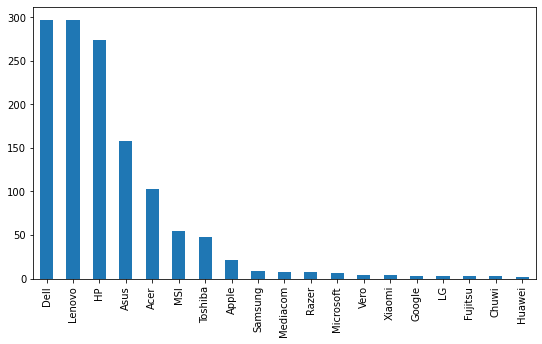

In [11]:
plt.figure(figsize=(9,5))
laptop_cleaned['Company'].value_counts().plot(kind='bar')

In [12]:
(laptop_cleaned['Company'].value_counts()/sum(laptop_cleaned['Company'].value_counts()))*100

Dell         22.793553
Lenovo       22.793553
HP           21.028396
Asus         12.125863
Acer          7.904835
MSI           4.144282
Toshiba       3.683807
Apple         1.611665
Samsung       0.690714
Mediacom      0.537222
Razer         0.537222
Microsoft     0.460476
Vero          0.306984
Xiaomi        0.306984
Google        0.230238
LG            0.230238
Fujitsu       0.230238
Chuwi         0.230238
Huawei        0.153492
Name: Company, dtype: float64

We have more stock of Lenovo,Dell and Hp laptops comprising of 63% of the total laptop companies being sold.

#### Comparing the average price to the TypeName of the laptop


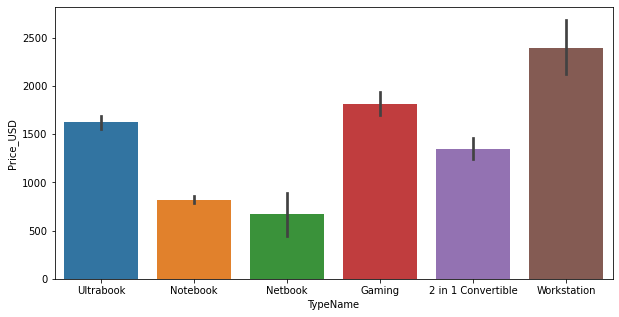

In [39]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Price_USD',data=laptop_cleaned);


Workstations are on average the most expensive laptop in stock followed by Gaming laptops,Ultrabook,2 in 1 Convertible then Notebook and Netbook respectively.

#### Laptop  TypeName  distribution

<AxesSubplot:>

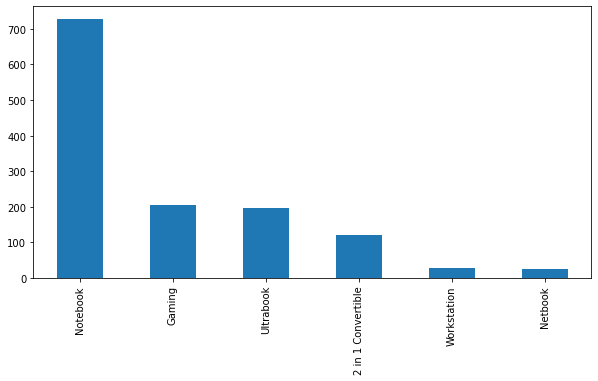

In [13]:
plt.subplots(figsize=(10,5))
laptop_cleaned['TypeName'].value_counts().plot(kind='bar')

In [14]:
laptop_cleaned['TypeName'].value_counts().reset_index()

,index,TypeName
0,Notebook,727
1,Gaming,205
2,Ultrabook,196
3,2 in 1 Convertible,121
4,Workstation,29
5,Netbook,25


Laptop's of the type name Notebook are of low price and seem to be  stocked more followed by Gaming,Ultrabook and 2 in 1 Convertible laptops , Workstations and Netbook laptops have the least stock below 50 in quantity.

#### Laptop Price distribution

<AxesSubplot:>

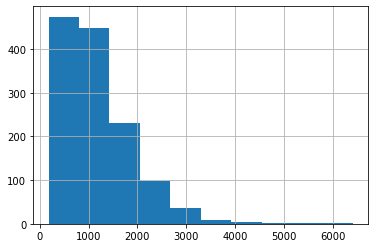

In [40]:
laptop_cleaned['Price_USD'].hist()

Most laptop prices fetch between prices of 500-1500 usd.

#### The Relation of Laptop Cpu Vender and the  Price

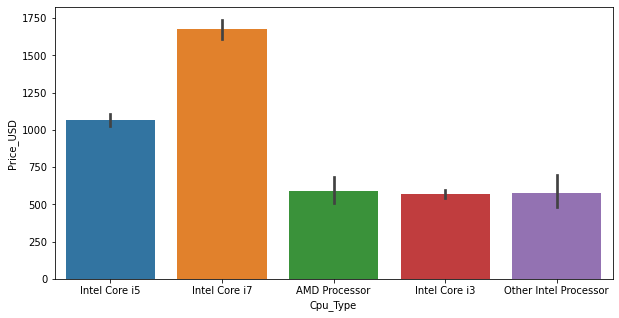

In [41]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Cpu_Type',y='Price_USD',data=laptop_cleaned);

From the cumulative  laptops in stock most of their CPUs fetch high prices above 1000 are from intel core i7 followed Intel Core i5 then the AMD Processor,Intel Core i3 and other Intel Processor all fetch prices below 750 usd 

#### The Relation of Laptop CPU Vender and the Price

<Figure size 1080x720 with 0 Axes>

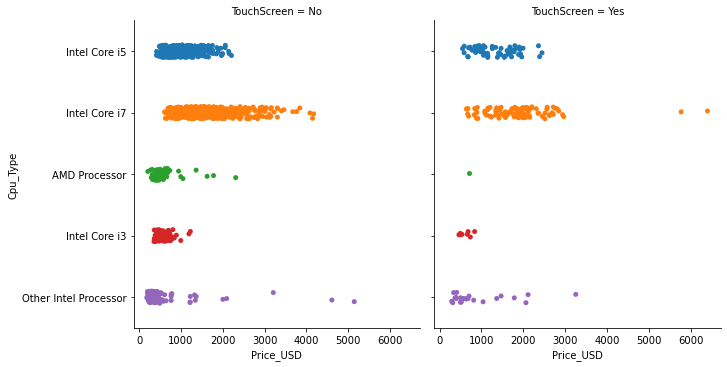

In [42]:
plt.figure(figsize=(15,10))
sns.catplot(x='Price_USD',y='Cpu_Type',col='TouchScreen',data=laptop_cleaned)
plt.show()

Here we can see that Intel CPUs are the majority of the laptop CPUs with laptop price variations from 500-above 5000 followed by AMD CPUS and we have only one CPU from Samsung. AMD and the Samsung CPUs majority of the laptops using them below 1000 USD.

Laptops with i5 and i7 CPUS are the most expensive.

### The laptop RAM relation to Price

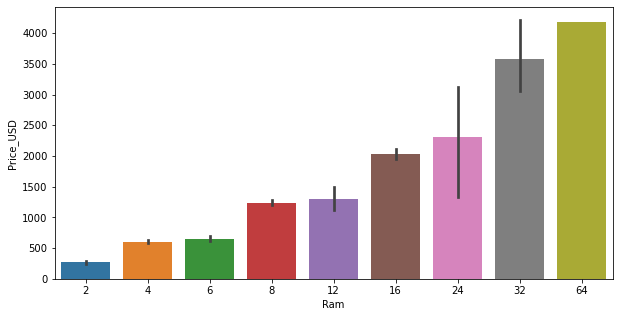

In [43]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Ram',y='Price_USD',data=laptop_cleaned);

The higher the RAM size the higher the laptop Price  

### Laptop Screen Size and the price

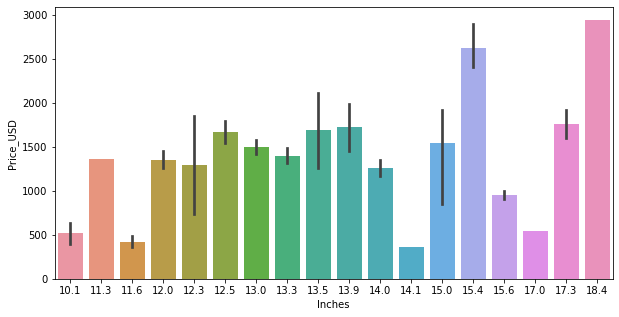

In [15]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Inches',y='Price_USD',data=laptop_cleaned);

Here we find out that a majority of the laptops have 18.4 screen size followed by 15.4 fetching cumulative prices of above 2500 USD.

#### Laptop Operating System Type vs Price

<AxesSubplot:xlabel='OpSys', ylabel='Price_USD'>

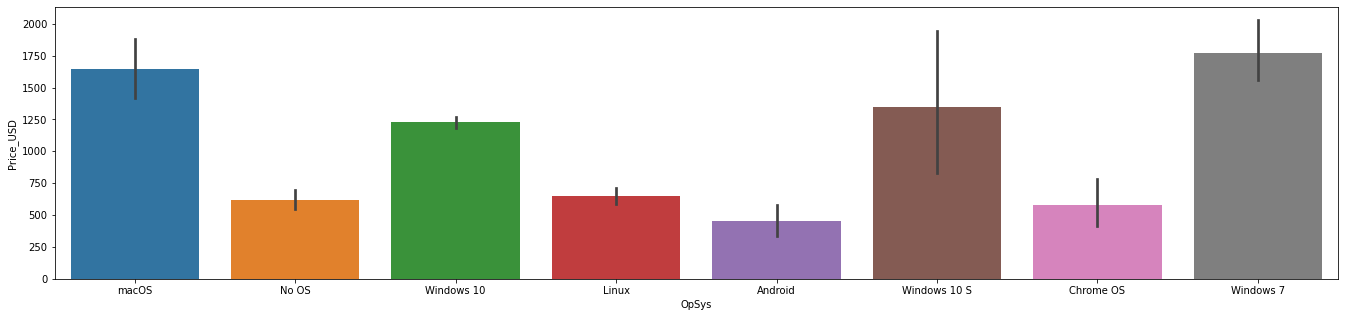

In [44]:
plt.figure(figsize=(23,5))
sns.barplot(x='OpSys',y='Price_USD',data=laptop_cleaned)

Laptops with windows 10 S (a version of Windows 10 that's streamlined for security and performance, while providing a familiar Windows experience.) cumulatively have high prices followed by laptops with windows 7 then laptops with MacOS then those with windows 10 as the top 4 operating systems among the laptops being sold. 

<AxesSubplot:>

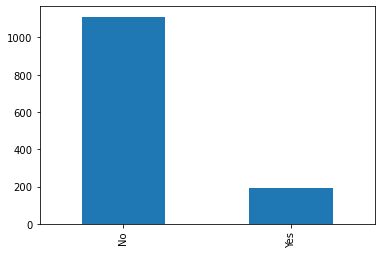

In [45]:
#A majority of the laptops are not touch screen
laptop_cleaned['TouchScreen'].value_counts().plot(kind='bar')

#### Laptop Cpu speed vs It's Ram

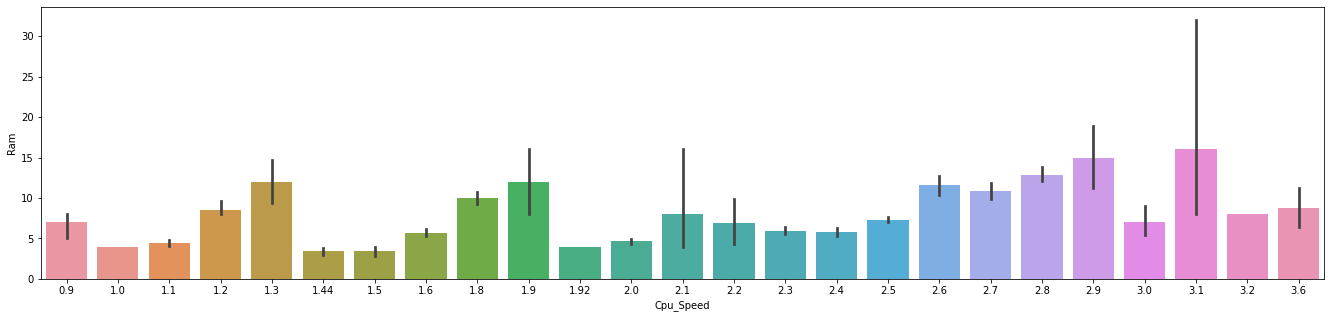

In [16]:
plt.figure(figsize=(23,5))
sns.barplot(x='Cpu_Speed',y='Ram',data=laptop_cleaned);

When you compare the laptop CPU Speed with it's Ram you find that the higher the Ram the more the CPU speed. A higher Ram  increases the CPU speed.

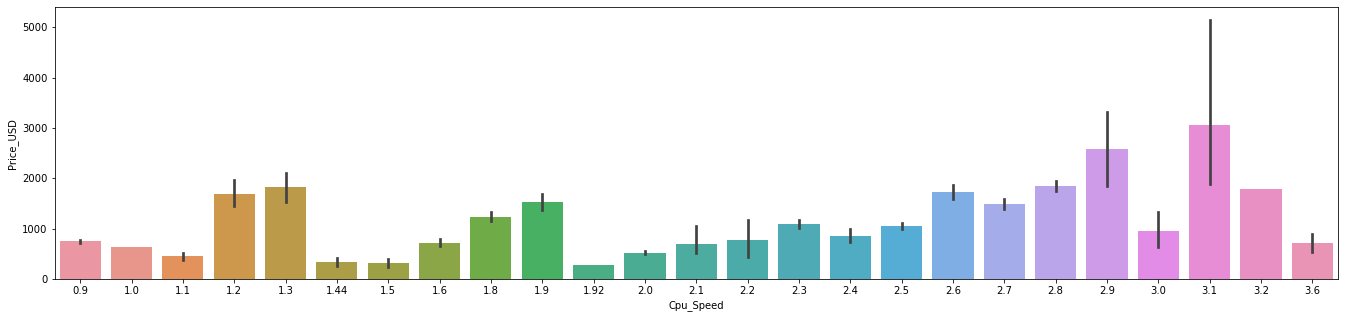

In [80]:
plt.figure(figsize=(23,5))
sns.barplot(x='Cpu_Speed',y='Price_USD',data=laptop_cleaned);

Worth noting is when comparing the CPU speed with the laptop price we find out that the price for CPU with speeds 1.2 and 1.3 (GHz) have RAM of 8GB and 12 GB respectively hence the high price despite low speed.

When you compare the laptop CPU Speed vs it's RAM and the CPU speed vs the laptop price we can conclude that the higher the CPU speed and the RAM capacity the more the price of the laptop and vice versa.

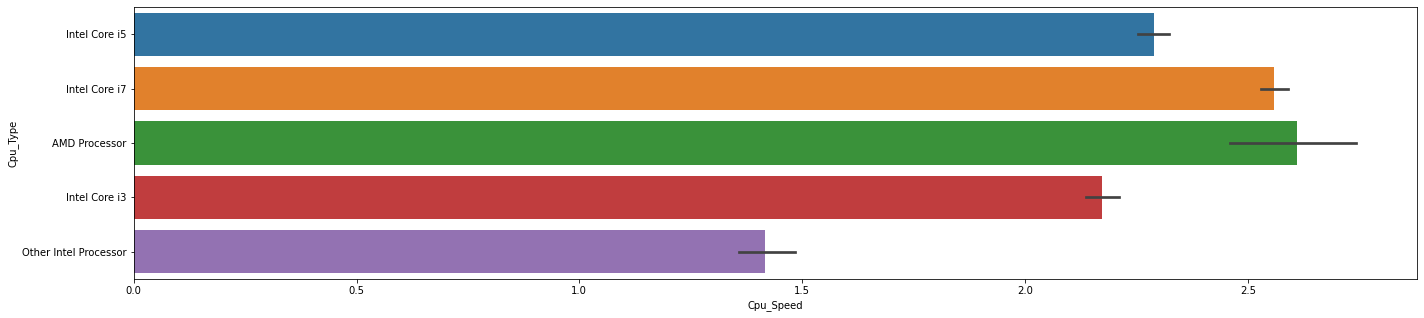

In [79]:
plt.figure(figsize=(23,5))
sns.barplot(x='Cpu_Speed',y='Cpu_Type',data=laptop_cleaned);

#### Label Encoding for Touch Screen values Yes & No  to 1 & 0

In [82]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

print('Current column values :',laptop_cleaned['TouchScreen'].unique())
print('After encoding :',le.fit_transform(laptop_cleaned['TouchScreen'].unique()))

Current column values : ['No' 'Yes']
After encoding : [0 1]


In [83]:
laptop_cleaned['TouchScreen']=le.fit_transform(laptop_cleaned['TouchScreen'])

In [81]:
laptop_cleaned.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,13.3,8,macOS,1.34,No,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,15.6,8,No OS,1.86,No,0,2.5,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,15.4,16,macOS,1.83,No,1,2.7,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,13.3,8,macOS,1.37,No,1,3.1,Intel Core i5,Intel,0,256,226.983005,1893.78


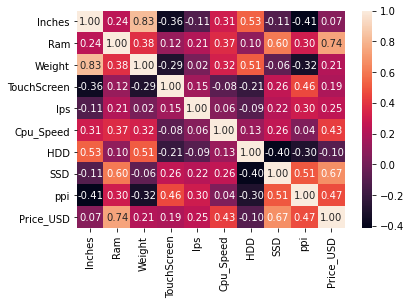

In [68]:
laptop_corr=laptop_cleaned.corr()
sns.heatmap(laptop_corr,xticklabels=laptop_corr.columns,yticklabels=laptop_corr.columns,annot=True,fmt='.2f');

### 5. Modelling
we've done enough EDA(we could always do more)but let's start to do some model-driven EDA.

In [84]:
#Import required libraies for our models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics  import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [12]:
laptop_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int64  
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   TouchScreen  1303 non-null   int32  
 7   Ips          1303 non-null   int64  
 8   Cpu_Speed    1303 non-null   float64
 9   Cpu_Type     1303 non-null   object 
 10  Gpu_vender   1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
 13  ppi          1303 non-null   float64
 14  Price_USD    1303 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(5)
memory usage: 147.7+ KB


#### Convert strings to categories
Performing data preprocessing wher we convert our data string values into categories assgining a numeric category code. 

In [23]:
#This will turn all the string values into category values.
for label,content in laptop_cleaned.items():
    if pd.api.types.is_string_dtype(content):
        laptop_cleaned[label]=content.astype("category").cat.as_ordered()

In [89]:
laptop_cleaned.dtypes

Company         object
TypeName        object
Inches         float64
Ram              int64
OpSys           object
Weight         float64
TouchScreen      int32
Ips              int64
Cpu_Speed      float64
Cpu_Type        object
Gpu_vender      object
HDD              int64
SSD              int64
ppi            float64
Price_USD      float64
dtype: object

In [24]:
#Turn categorical values into numbers
for label,content in laptop_cleaned.items():
    if not pd.api.types.is_numeric_dtype(content):
    #Turn categories into numbers 
        laptop_cleaned[label]=pd.Categorical(content).codes

In [87]:
laptop_cleaned.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,13.3,8,macOS,1.37,0,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,13.3,8,macOS,1.34,0,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,15.6,8,No OS,1.86,0,0,2.5,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,15.4,16,macOS,1.83,0,1,2.7,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,13.3,8,macOS,1.37,0,1,3.1,Intel Core i5,Intel,0,256,226.983005,1893.78


Now all our dataset values are in numerical format let just visualize our correlation matrix again with all the features.

<AxesSubplot:>

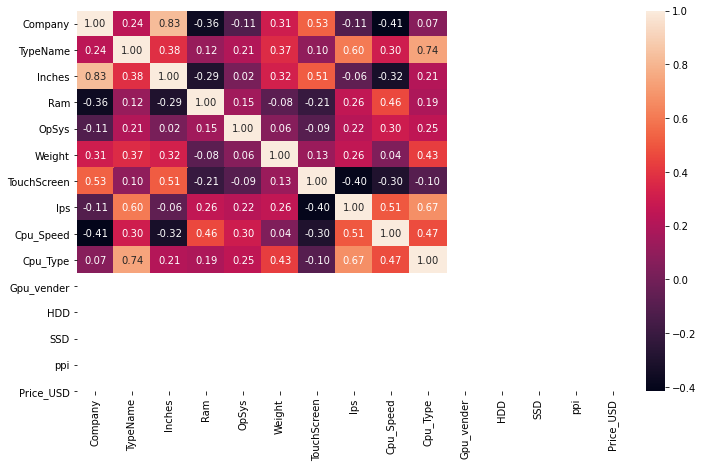

In [88]:
plt.figure(figsize=(12,7))
sns.heatmap(laptop_cleaned.corr(),xticklabels=laptop_cleaned.columns,yticklabels=laptop_cleaned.columns,annot=True,fmt='.2f')

As seen earlier the RAM of a laptop has a high correlation to the price ,followed by the laptop storage type of SSD,ppi,then the Cpu_Speed,Gpu_Vender ,Operating System(OpSys),IPS and CPU Type with values (ranging 0.74 - 0.25).

#### Building a machine learning model.
We shall use regression models as the nature of the variable we want to predict is in a discrete form(laptop price)
* We shall start with linear regression
* Decision Trees
* Random Forest
* XGBoost 

#### Get our target variable and feature variables (X and Y values)

In [27]:
laptop_features=laptop_cleaned.drop('Price_USD',axis=1)
laptop_price=np.log(laptop_cleaned['Price_USD'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_USD', ylabel='Density'>

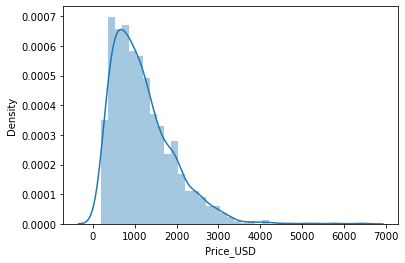

In [28]:
#Plot a distribution plot for the price data
sns.distplot(laptop_cleaned['Price_USD'])

The laptop prices being the target variable is rightly skewed we will need to perform log transformation to have a normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_USD', ylabel='Density'>

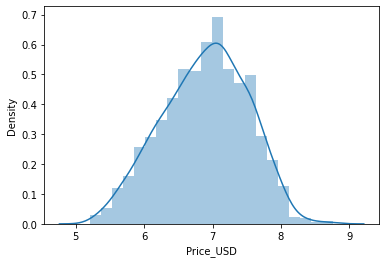

In [29]:
#Plot a distribution plot for the price data
sns.distplot(np.log(laptop_cleaned['Price_USD']))

We now have a normal distribution of our laptop prices which is important when splitting our training and testing data.

In [86]:
laptop_features.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi
0,1,4,13.3,8,7,1.37,0,1,2.3,2,2,0,128,226.983005
1,1,4,13.3,8,7,1.34,0,0,1.8,2,2,0,0,127.677940
2,7,3,15.6,8,3,1.86,0,0,2.5,2,2,0,256,141.211998
3,1,4,15.4,16,7,1.83,0,1,2.7,3,0,0,512,220.534624
4,1,4,13.3,8,7,1.37,0,1,3.1,2,2,0,256,226.983005


#### Splitting data into train/test sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(laptop_features,laptop_price,test_size=0.1,random_state=42)

In [32]:
X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi
1276,4,3,15.6,6,4,2.30,0,0,2.40,1,2,1000,0,100.454670
282,10,1,15.6,8,4,2.50,0,1,2.50,2,3,0,256,141.211998
344,4,4,13.3,8,4,1.20,0,0,1.80,3,2,0,256,165.632118
1289,2,4,13.3,8,4,1.20,0,1,0.90,4,2,0,512,165.632118
965,4,3,15.6,4,2,2.25,0,0,2.00,1,0,1000,0,100.454670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,3,15.6,8,4,2.40,0,0,2.50,2,3,1000,256,141.211998
1130,7,3,15.6,8,4,2.04,0,0,2.70,3,2,2000,0,100.454670
1294,7,3,15.6,6,4,2.04,0,0,2.90,0,0,0,0,141.211998
860,10,3,15.6,8,4,2.30,0,1,2.50,2,2,1000,0,141.211998


#### Linear Regression

In [33]:
#instantiate our model
linear_model=LinearRegression()

In [37]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [38]:
#Using our model to predict on trained values
pred=linear_model.predict(X_test)
#Obtain the mean squared error of our model
linear_model_mae =mean_absolute_error(y_test,pred)
linear_model_r2score=r2_score(y_test,pred)
print('Linear Regression mean absolute  error :', linear_model_mae)
print('Linear Regression r2_score :', linear_model_r2score)

Linear Regression mean absolute  error : 0.2709238706235368
Linear Regression r2_score : 0.6866889007414554


#### Decision Tree Regressor

In [39]:
def get_random_mae(max_leaf_nodes,X_train,X_test,y_train,y_test):
    dt_model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    dt_model.fit(X_train,y_train)
    dt_pred=dt_model.predict(X_test)
    print("Decision Tree R2 score: %.2f "%r2_score(y_test,dt_pred))
    dt_mae=mean_absolute_error(y_test,dt_pred)
    return(dt_mae)
for max_leaf_nodes in [5,10,20,30,50,100,300,500]:
    dt_mae=get_random_mae(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes : %d  MAE: %d\n"%(max_leaf_nodes,dt_mae))

 

Decision Tree R2 score: 0.69 
Max leaf nodes : 5  MAE: 0

Decision Tree R2 score: 0.78 
Max leaf nodes : 10  MAE: 0

Decision Tree R2 score: 0.81 
Max leaf nodes : 20  MAE: 0

Decision Tree R2 score: 0.81 
Max leaf nodes : 30  MAE: 0

Decision Tree R2 score: 0.83 
Max leaf nodes : 50  MAE: 0

Decision Tree R2 score: 0.81 
Max leaf nodes : 100  MAE: 0

Decision Tree R2 score: 0.77 
Max leaf nodes : 300  MAE: 0

Decision Tree R2 score: 0.76 
Max leaf nodes : 500  MAE: 0



The Decision Tree model perfoms better with parameter tuning of leaf nodes at 50 and with more leaf nodes after 50 added it drops. Best to keep the leaf nodes at 50 max for this model.

#### Random Forest

In [40]:
#instantiate our model
rf_model=RandomForestRegressor()

In [41]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
rf_pred=rf_model.predict(X_test)

In [43]:
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2score=r2_score(y_test,rf_pred)

print('Random Forest Regressor mean absolute error %.2f:'%rf_mae)
print('Random Forest Regressor r2 _score %.2f:'%rf_r2score)

Random Forest Regressor mean absolute error 0.16:
Random Forest Regressor r2 _score 0.87:


Even without trying with various leaf nodes the Random Forest Model baseline r2score is better than the first two models but our MAE is higher.

In [44]:
from sklearn.metrics import mean_absolute_error
#Trying Random Forest Regression model with different leaf nodes and their mae output
def get_random_mae(max_leaf_nodes,X_train,X_test,y_train,y_test):
    rf_model=RandomForestRegressor(max_leaf_nodes=max_leaf_nodes,max_samples=0.5,max_features=0.75,max_depth=15,random_state=3)
    rf_model.fit(X_train,y_train)
    rf_pred=rf_model.predict(X_test)
    print("R2 Score: %.2f"%(r2_score(y_test,rf_pred)))
    mae=mean_absolute_error(y_test,rf_pred)
    return (mae)
for max_leaf_nodes in [5,10,20,30,50,100,200,300,500]:
    mae=get_random_mae(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes:%d \t MAE : %.2f\n"%(max_leaf_nodes,mae))
  

R2 Score: 0.75
Max leaf nodes:5 	 MAE : 0.25

R2 Score: 0.83
Max leaf nodes:10 	 MAE : 0.20

R2 Score: 0.86
Max leaf nodes:20 	 MAE : 0.18

R2 Score: 0.87
Max leaf nodes:30 	 MAE : 0.17

R2 Score: 0.88
Max leaf nodes:50 	 MAE : 0.16

R2 Score: 0.88
Max leaf nodes:100 	 MAE : 0.15

R2 Score: 0.89
Max leaf nodes:200 	 MAE : 0.15

R2 Score: 0.89
Max leaf nodes:300 	 MAE : 0.15

R2 Score: 0.89
Max leaf nodes:500 	 MAE : 0.15



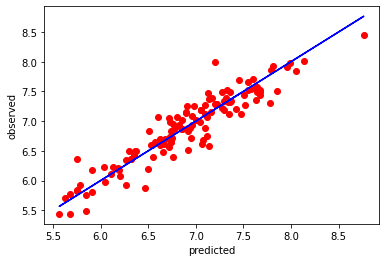

In [45]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
 

plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,rf_pred, color='red')
plt.plot(y_test,y_test, color='blue')

From the output above we can see that as we increase the leaf nodes our R2 score increases however we need not to add to much nodes we don't want our model to overfit on our traning data. 

Our Random Forest Regression model with Max leaf nodes at 200 returns a better r2 score and a lower MAE than Linear and  Decision Tree regression models.Best to use the max leaf nodes at 200.

#### XGBoost Regression

In [46]:
from xgboost import XGBRegressor 

In [47]:
#instantiate our model
xgb_model=XGBRegressor()

In [48]:
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
xgb_mae=mean_absolute_error(y_test,xgb_pred)
xgb_r2score=r2_score(y_test,xgb_pred)

print("XGBBoost Regression model MAE : %.2f"%xgb_mae)
print("XGBoost Regression model r2 Score : %.2f"%xgb_r2score)

XGBBoost Regression model MAE : 0.15
XGBoost Regression model r2 Score : 0.88


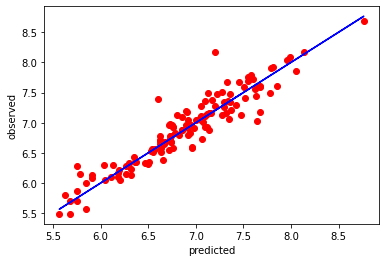

In [49]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
 

plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,xgb_pred, color='red')
plt.plot(y_test,y_test, color='blue')

The baseline score of our XGBoost model performs better achieving a score that made by parameter tuning of Random Forest Algorithm. An r2 Score of 0.88 which was an improved score following log transformation of our target variable.

#### Exporting our model

#### Web App for our Model Deployment

We shall use streamlit to create a web app to predict laptop prices. In a web application, we need to implement a form that takes all the inputs from users that we have used in a dataset, and by using the dumped model we predict the output and display it to a user.

In [91]:
laptop_cleaned.drop('Inches',axis=1,inplace=True)

In [70]:
laptop_cleaned.drop('Cpu_Speed',axis=1,inplace=True)

In [92]:
X=laptop_cleaned.drop('Price_USD',axis=1)
y=np.log(laptop_cleaned['Price_USD'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [95]:
laptop_cleaned.head(2)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,8,macOS,1.37,0,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,8,macOS,1.34,0,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89


In [72]:
laptop_cleaned.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,8,macOS,1.37,0,1,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,8,macOS,1.34,0,0,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,8,No OS,1.86,0,0,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,16,macOS,1.83,0,1,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,8,macOS,1.37,0,1,Intel Core i5,Intel,0,256,226.983005,1893.78


In [94]:
step1=ColumnTransformer(transformers=[
('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[0,1,3,8,9])],
remainder='passthrough')

step2=RandomForestRegressor(n_estimators=200,max_samples=0.5,max_features=0.75,max_depth=15,random_state=3)

pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9025739337149884
MAE 0.1565443878011568


In [96]:
import pickle
laptop_cleaned.to_csv("laptop_cleaned.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))


In [97]:
df = pd.read_csv('laptop_cleaned.csv')
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,Ips,Cpu_Speed,Cpu_Type,Gpu_vender,HDD,SSD,ppi,Price_USD
0,Apple,Ultrabook,8,macOS,1.37,0,1,2.3,Intel Core i5,Intel,0,128,226.983005,1406.67
1,Apple,Ultrabook,8,macOS,1.34,0,0,1.8,Intel Core i5,Intel,0,0,127.677940,943.89
2,HP,Notebook,8,No OS,1.86,0,0,2.5,Intel Core i5,Intel,0,256,141.211998,603.75
3,Apple,Ultrabook,16,macOS,1.83,0,1,2.7,Intel Core i7,AMD,0,512,220.534624,2664.32
4,Apple,Ultrabook,8,macOS,1.37,0,1,3.1,Intel Core i5,Intel,0,256,226.983005,1893.78


In [62]:
import sklearn
sklearn.__version__

'1.1.1'